In [126]:
import pandas as pd
import numpy as np

train = pd.read_csv('CVKaggleData/train.csv')
trainDF = train.iloc[1:]
submission = pd.read_csv('CVKaggleData/submission.csv')



####Training images == the train csv
####Testing images == the test csv


display(trainDF.head())
print("length of train: " , len(train))

,name,x1,x2,y1,y2,classname
1,2756.png,505,10,723,283,face_with_mask
2,2756.png,75,252,264,390,mask_colorful
3,2756.png,521,136,711,277,mask_colorful
4,6098.jpg,360,85,728,653,face_no_mask
5,6427.png,218,98,577,580,face_with_mask_incorrect


length of train:  15412


In [127]:
display(submission.head())
print("length of submission: " , len(submission))

,name,x1,x2,y1,y2,classname
0,1800.jpg,NaN,NaN,NaN,NaN,NaN
1,1800.jpg,NaN,NaN,NaN,NaN,NaN
2,1800.jpg,NaN,NaN,NaN,NaN,NaN
3,1799.jpg,NaN,NaN,NaN,NaN,NaN
4,1799.jpg,NaN,NaN,NaN,NaN,NaN


length of submission:  8142


In [128]:
print(train["name"])
print(train["classname"])

0        2756.png
1        2756.png
2        2756.png
3        2756.png
4        6098.jpg
           ...   
15407    1894.jpg
15408    1894.jpg
15409    1894.jpg
15410    3216.png
15411    3216.png
Name: name, Length: 15412, dtype: object
0        face_with_mask
1        face_with_mask
2         mask_colorful
3         mask_colorful
4          face_no_mask
              ...      
15407    face_with_mask
15408     mask_surgical
15409               hat
15410    face_with_mask
15411     mask_colorful
Name: classname, Length: 15412, dtype: object


In [129]:
myList = []
for idx, row in train.iterrows():
    train.loc[idx, "name"] = "CVKaggleData/mm/mm/mm/images/" + train.loc[idx , "name"]
    #train.loc[idx, "x1"] = [train.loc[idx, "x1"] , train.loc[idx, "x2"] , train.loc[idx, "y1"] , train.loc[idx, "y2"]]
    myList.append([train.loc[idx, "x1"] , train.loc[idx, "x2"] , train.loc[idx, "y1"] , train.loc[idx, "y2"]])
    #print(myList[-1])
    #train.loc[idx, "newCol"] = pd.Series(np.array(myList[-1]))
    #if  df.loc[idx,'Qty'] == 1 and df.loc[idx,'Price'] == 10:
    #    df.loc[idx,'Buy'] = 1
train["newCol"] = myList
dicty = {}
for idx, row in train.iterrows():
    if train.loc[idx , "name"] not in dicty:
        dicty[train.loc[idx , "name"]] =  [train.loc[idx , "newCol"]]
    else:
        dicty[train.loc[idx , "name"]] +=  [train.loc[idx , "newCol"]]
    
    #train.loc[idx, "name"] = 
    #train.loc[idx, "x1"] = [train.loc[idx, "x1"] , train.loc[idx, "x2"] , train.loc[idx, "y1"] , train.loc[idx, "y2"]]
    #myList.append([train.loc[idx, "x1"] , train.loc[idx, "x2"] , train.loc[idx, "y1"] , train.loc[idx, "y2"]])
    #print(myList[-1])
    #train.loc[idx, "newCol"] = pd.Series(np.array(myList[-1]))
    #if  df.loc[idx,'Qty'] == 1 and df.loc[idx,'Price'] == 10:
    #    df.loc[idx,'Buy'] = 1


display(train)




,name,x1,x2,y1,y2,classname,newCol
0,CVKaggleData/mm/mm/mm/images/2756.png,69,126,294,392,face_with_mask,"[69, 126, 294, 392]"
1,CVKaggleData/mm/mm/mm/images/2756.png,505,10,723,283,face_with_mask,"[505, 10, 723, 283]"
2,CVKaggleData/mm/mm/mm/images/2756.png,75,252,264,390,mask_colorful,"[75, 252, 264, 390]"
3,CVKaggleData/mm/mm/mm/images/2756.png,521,136,711,277,mask_colorful,"[521, 136, 711, 277]"
4,CVKaggleData/mm/mm/mm/images/6098.jpg,360,85,728,653,face_no_mask,"[360, 85, 728, 653]"
...,...,...,...,...,...,...,...
15407,CVKaggleData/mm/mm/mm/images/1894.jpg,437,121,907,644,face_with_mask,"[437, 121, 907, 644]"
15408,CVKaggleData/mm/mm/mm/images/1894.jpg,557,363,876,636,mask_surgical,"[557, 363, 876, 636]"
15409,CVKaggleData/mm/mm/mm/images/1894.jpg,411,3,940,325,hat,"[411, 3, 940, 325]"
15410,CVKaggleData/mm/mm/mm/images/3216.png,126,69,409,463,face_with_mask,"[126, 69, 409, 463]"


8544
here
here
[[69, 126, 294, 392], [505, 10, 723, 283], [75, 252, 264, 390], [521, 136, 711, 277]]
[[69, 126, 294, 392], [505, 10, 723, 283], [75, 252, 264, 390], [521, 136, 711, 277]]


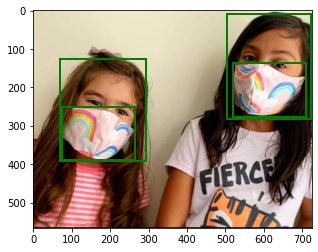

In [130]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import matplotlib.patches as p
from matplotlib.patches import Rectangle

#print(dicty)
arrFin = []
for idx, row in train.iterrows():
    #print("oh: " , train.loc[idx , "name"])
    #print(dicty[train.loc[idx , "name"]])
    val = dicty[train.loc[idx , "name"]]
    arrFin.append(val)
train["commonPosition"] = arrFin


image = "CVKaggleData/mm/mm/mm/images/2756.png"
img = imread(image)

train = train[(train.classname == "face_with_mask")| (train.classname == "mask_surgical")| (train.classname == "face_with_mask_incorrect") |  (train.classname == "face_shield")|  (train.classname == "gas_mask") |  (train.classname == "face_no_mask")]    
#display(train)
print(len(train))

fig , axis1 = plt.subplots()
axis1.imshow(img)
myArr = []



for idx, row in train.iterrows():
    #print("oh: " , train.loc[idx , "name"])
    if train.loc[idx , "name"] == "CVKaggleData/mm/mm/mm/images/2756.png":
        print("here")
        arr = train.loc[idx , "commonPosition"]
        for i in arr:
            if i not in myArr:
                myArr.append(i)
print(myArr)
#train.loc[idx, "name"] = "CVKaggleData/mm/mm/mm/images/" + train.loc[idx , "name"]
print(myArr)
#train["newCol"] = myList
for i in range(len(myArr)):
    plt.gca().add_patch(Rectangle((myArr[i][0],myArr[i][1]),myArr[i][2]-myArr[i][0],myArr[i][3]-myArr[i][1],linewidth=2,edgecolor='green',facecolor='none'))

plt.show()








In [146]:
from sklearn.model_selection import train_test_split

dataFrame = pd.DataFrame([], columns=['name', 'classname', 'commonPosition'])

array = []
val = []
val1 = []
val2 = []

for idx, row in train.iterrows():
    #print("oh: " , train.loc[idx , "name"])
    
    if train.loc[idx , "name"] not in array:
        val1.append(train.loc[idx , "name"])
        val2.append(train.loc[idx , "classname"])
        val.append(train.loc[idx , "commonPosition"])
        array.append(train.loc[idx , "name"])
    else:
        continue
dataFrame["name"] = val1
dataFrame["commonPosition"] = val
dataFrame["classname"] = val2

#display(dataFrame)
#for i in train:
#    df.drop(['Cochice', 'Pima'])

for idx, row in dataFrame.iterrows():
    #print("oh: " , train.loc[idx , "name"])
    
    if dataFrame.loc[idx , "classname"] == "mask_surgical" or dataFrame.loc[idx , "classname"] == "face_shield" or dataFrame.loc[idx , "classname"] == "gas_mask":
        dataFrame.loc[idx , "classname"] = "face_with_mask"
     
    elif dataFrame.loc[idx , "classname"] == "face_with_mask_incorrect" or dataFrame.loc[idx , "classname"] == "face_no_mask":
        dataFrame.loc[idx , "classname"] = "mask_incorrect"
#display(dataFrame)
labels = []
for idx, row in dataFrame.iterrows():
    #print("oh: " , train.loc[idx , "name"])
    
    if dataFrame.loc[idx , "classname"] == "face_with_mask" :
        labels.append(1)
     
    elif dataFrame.loc[idx , "classname"] == "mask_incorrect":
        labels.append(0)


#mylabels = dataFrame["classname"]
print(labels)
trainX,testX,trainY,testY = train_test_split(dataFrame, labels, test_size=0.20, shuffle=False)

display(trainX)
display(trainY)




[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 

,name,classname,commonPosition
0,CVKaggleData/mm/mm/mm/images/2756.png,face_with_mask,"[[69, 126, 294, 392], [505, 10, 723, 283], [75..."
1,CVKaggleData/mm/mm/mm/images/6098.jpg,mask_incorrect,"[[360, 85, 728, 653]]"
2,CVKaggleData/mm/mm/mm/images/6427.png,mask_incorrect,"[[218, 98, 577, 580], [278, 386, 582, 582]]"
3,CVKaggleData/mm/mm/mm/images/4591.png,face_with_mask,"[[239, 9, 522, 342], [255, 159, 491, 341]]"
4,CVKaggleData/mm/mm/mm/images/5525.jpg,mask_incorrect,"[[262, 18, 484, 319], [49, 58, 191, 247]]"
...,...,...,...
2812,CVKaggleData/mm/mm/mm/images/2357.png,face_with_mask,"[[193, 58, 438, 344], [194, 189, 429, 342], [2..."
2813,CVKaggleData/mm/mm/mm/images/3446.png,face_with_mask,"[[64, 60, 381, 520], [73, 279, 366, 513]]"
2814,CVKaggleData/mm/mm/mm/images/4446.png,face_with_mask,"[[395, 205, 483, 299], [440, 254, 475, 296]]"
2815,CVKaggleData/mm/mm/mm/images/5435.jpg,face_with_mask,"[[105, 191, 600, 830], [180, 127, 553, 693], [..."


,name,classname,commonPosition
2817,CVKaggleData/mm/mm/mm/images/3179.png,mask_incorrect,"[[181, 350, 236, 422], [251, 176, 353, 302], [..."
2818,CVKaggleData/mm/mm/mm/images/3462.png,face_with_mask,"[[121, 4, 960, 668], [237, 294, 818, 669], [19..."
2819,CVKaggleData/mm/mm/mm/images/5152.jpg,face_with_mask,"[[401, 60, 702, 454], [430, 250, 671, 449], [4..."
2820,CVKaggleData/mm/mm/mm/images/2629.png,mask_incorrect,"[[331, 11, 430, 144]]"
2821,CVKaggleData/mm/mm/mm/images/4290.png,face_with_mask,"[[240, 12, 674, 514], [246, 216, 626, 514]]"
...,...,...,...
3517,CVKaggleData/mm/mm/mm/images/4149.png,face_with_mask,"[[4, 1, 431, 372], [399, 71, 718, 581], [66, 9..."
3518,CVKaggleData/mm/mm/mm/images/3389.png,face_with_mask,"[[101, 2, 435, 456], [143, 246, 417, 453], [11..."
3519,CVKaggleData/mm/mm/mm/images/2460.png,mask_incorrect,"[[261, 36, 417, 239], [650, 5, 805, 184], [260..."
3520,CVKaggleData/mm/mm/mm/images/1894.jpg,face_with_mask,"[[437, 121, 907, 644], [557, 363, 876, 636], [..."


In [147]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

NameError: name 'fasterrcnn_resnet50_fpn' is not defined